<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_23_SVM_MnistKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machines and comparison with other models using Mnist keras dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import rmsprop_v2
import pylab as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

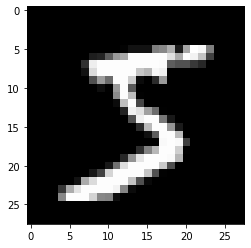

In [ ]:
plt.imshow(x_train[0],cmap = "gray")

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
y_train.astype('int').shape

(60000,)

In [ ]:
from sklearn.svm import LinearSVC
svmmodel = LinearSVC()
svmmodel.fit(x_train,y_train.astype('int'))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import *
print("Accuracy: ",accuracy_score(y_test, svmmodel.predict(x_test)))
print("Recall: ",recall_score(y_test, svmmodel.predict(x_test), average=None)[0])
print("Precission: ",precision_score(y_test, svmmodel.predict(x_test), average=None)[0])
print("Confusion Matrix: -")
print(confusion_matrix(y_test, svmmodel.predict(x_test)))

Accuracy:  0.9182
Recall:  0.9816326530612245
Precission:  0.9487179487179487
Confusion Matrix: -
[[ 962    0    2    1    1    4    5    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  912   18   10    4   13   12   38    3]
 [   4    0   19  918    2   22    5   12   19    9]
 [   1    4    6    3  913    0    9    3    5   38]
 [   9    2    0   38   12  767   18    7   31    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   23    5    7    1    1  948    5   28]
 [  11   12    8   20   14   31    8   13  845   12]
 [   7    8    2   15   31   12    0   26   12  896]]


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train.astype('int'))
print("Accuracy: ",accuracy_score(y_test, clf.predict(x_test)))
print("Recall: ",recall_score(y_test, clf.predict(x_test), average=None)[0])
print("Precision: ",precision_score(y_test, clf.predict(x_test), average=None)[0])

Accuracy:  0.9256
Recall:  0.9785714285714285
Precision:  0.9513888888888888


In [ ]:
from sklearn.linear_model import Perceptron
percmodel = Perceptron(tol=1e-3, random_state=0)
percmodel.fit(x_train,y_train.astype('int'))
print("Accuracy: ",accuracy_score(y_test, percmodel.predict(x_test)))
print("Recall: ",recall_score(y_test, percmodel.predict(x_test), average=None)[0])
print("Precision: ",precision_score(y_test, percmodel.predict(x_test), average=None)[0])

Accuracy:  0.8824
Recall:  0.9683673469387755
Precision:  0.9518555667001003


In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(max_depth=2, random_state=0)
ranmodel.fit(x_train,y_train.astype('int'))
print("Precision: ",precision_score(y_test, ranmodel.predict(x_test), average=None)[0])
print("Recall: ",recall_score(y_test, ranmodel.predict(x_test), average=None)[0])

Precision:  0.6223369916074887
Recall:  0.9836734693877551


In [ ]:
import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import rmsprop_v2

In [ ]:
batch_size = 128
num_classes = 10
epochs = 30

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
flatten (Flatten)            (None, 10)                0         
Total params: 309,802
Trainable params: 309,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=30)

Epoch 1/30
469/469 [==============================] - 7s 13ms/step - loss: 1.0677 - accuracy: 0.6278
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.4181 - accuracy: 0.8757
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2977 - accuracy: 0.9112
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2343 - accuracy: 0.9303
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1983 - accuracy: 0.9409
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1742 - accuracy: 0.9476
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1578 - accuracy: 0.9523
Epoch 8/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1444 - accuracy: 0.9566
Epoch 9/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1338 - accuracy: 0.9595
Epoch 10/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1257 - accura

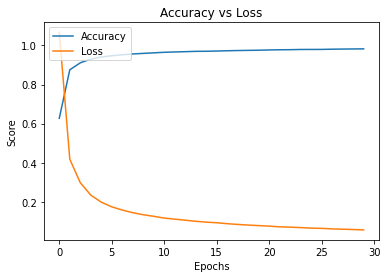

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.title('Accuracy vs Loss')
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()